Goal is to simulate why t-test linearization techniques are important for feature selection. If I have time I'll plot the same results against a linearized t-test model like the welch's.

## Random Distribution Generator

In [26]:
import math
import statistics
import matplotlib.pyplot as plt
import random
import numpy as np

In [6]:
def GraphDist(stdev, mean):
    # 100 linearly spaced numbers
    x = np.linspace(-5,5,100)
  
    # build equation
    #stdev = 1
    #mean = 0
    y = (1/(stdev*(math.sqrt(2*math.pi))))*math.pi**(-.5*((x-mean)/stdev)**2)
  
    # setting the axes at the centre
    fig = plt.figure()
  
    # plot the function
    plt.plot(x,y, 'r')

    # show the plot
    plt.show()

In [7]:
def MonteCarlo(stdev, mean, points, rangeVal, bin1):
    # generate x vals:
    xVals = []
    for x in range(points):
        a = random.randint(round(rangeVal[0], 0), round(rangeVal[1]-1, 0)) + random.random()
        # here
        if abs(round(rangeVal[0], 0))-abs(rangeVal[0]) != 0:
            divider = abs(abs(round(rangeVal[0], 0))-abs(rangeVal[0]))
            add = random.random()*divider
            a = a + add
        xVals.append(a)
    
    # define bins
    valsRange = abs(rangeVal[0]) + abs(rangeVal[1])
    #bins = np.arange(rangeVal[0], rangeVal[1]+valsRange/100, valsRange/100)
    bins = np.arange(rangeVal[0], rangeVal[1]+valsRange/bin1, valsRange/bin1)
    
    # fit each x val into bin counter
    tally = [0]*(len(bins)-1)
    for x in xVals:
        index = 0
        for y in range(len(bins)-1):
            if x <= bins[y+1] and x >= bins[y]:
                tally[index] += 1
            index += 1
                
    
    # get y val for each bin
    yVals = []
    for x in bins:
        #y = round((1/(stdev*(math.sqrt(2*math.pi))))*math.pi**(-.5*((x-mean)/stdev)**2) * 100000, 0)/1000
        y = (1/(stdev*(math.sqrt(2*math.pi))))*math.pi**(-.5*((x-mean)/stdev)**2)
        yVals.append(y)
        
    #weighted sum of each bin
    weightedSum = []
    for x in range(len(tally)):
        #weightedSum.append(round(tally[x]*yVals[x], 0))
        weightedSum.append(tally[x]*yVals[x])
    
    return bins, weightedSum

In [8]:
def NormalizeDistro(yVals):
    totalVal = sum(yVals)
    factor = 100/totalVal
    normalizedVals = []
    
    for y in yVals:
        app = y*factor
        normalizedVals.append(round(app, 0))
    
    return normalizedVals

In [9]:
stdev = 1
mean = 0
points = 10_000
rangeVal = [-5,5]
bins = 100

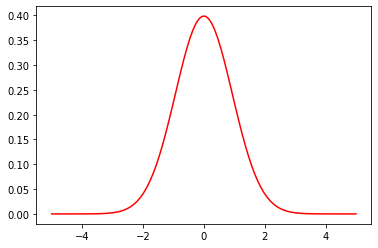

In [10]:
GraphDist(stdev, mean)

In [11]:
xVals, yVals = MonteCarlo(stdev, mean, points, rangeVal, bins)

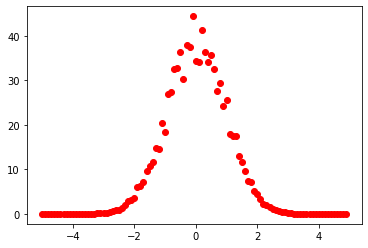

In [12]:
for x in range(len(yVals)):
    if yVals[x] != 0: 
        plt.scatter(xVals[x], yVals[x], color='r')

plt.show()

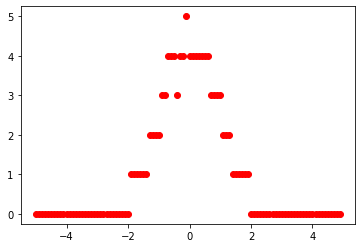

In [13]:
normalizedyVals = NormalizeDistro(yVals)
for x in range(len(yVals)):
    if yVals[x] != 0: 
        plt.scatter(xVals[x], normalizedyVals[x], color='r')

plt.show()

## T-Test Calculation

In [14]:
# imports
from scipy import stats

In [15]:
# convert sampling normal dist into a list of normal distribution - recommended to use un-normalized distribution
def MakeDist(xVals, yVals):
    # test space - building t-test distribution
    # take the popularity and create list where each xVal is added that many times, relatively creating the normal dist

    intDist = []
    #create list of lists
    for x in range(len(yVals)):
        app = [xVals[x]]*int(round(yVals[x], 0))
        intDist.append(app)

    #flatten the list (make it one dimensional)
    submitDist = []
    for x in intDist:
        for y in x:
            submitDist.append(y)

    #round the numbers to 2 decimal points for faster computation
    for x in range(len(submitDist)):
        submitDist[x] = round(submitDist[x], 2)

    return submitDist

In [16]:
# perform the calculation
def tTest(dist1, dist2):
    t_value,p_value = stats.ttest_ind(dist1,dist2)
    return t_value, p_value

0 -2.7
0 -2.6
0 -2.5
0 -2.4
1 -2.3
2 -2.2
2 -2.1
3 -2.0
5 -1.9
5 -1.8
6 -1.7
9 -1.6
10 -1.5
11 -1.4
14 -1.3
14 -1.2
19 -1.1
17 -1.0
26 -0.9
26 -0.8
32 -0.7
32 -0.6
35 -0.5
29 -0.4
37 -0.3
36 -0.2
43 -0.1
33 -0.0
33 0.1
40 0.2
35 0.3
33 0.4
35 0.5
31 0.6
27 0.7
28 0.8
23 0.9
25 1.0
17 1.1
16 1.2
16 1.3
12 1.4
11 1.5
9 1.6
6 1.7
6 1.8
4 1.9
3 2.0
2 2.1
1 2.2
1 2.3
1 2.4
0 2.5
0 2.6


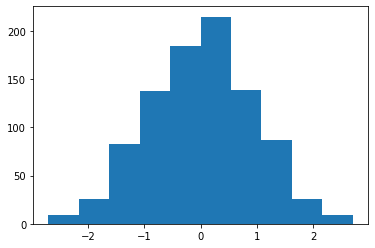

In [17]:
# for random testing - I think its an issue with plt.hist that makes it look skewed; look at the de facto distribution
submitDist = MakeDist(xVals, yVals)

counter = 0
for x in range(len(submitDist)-1):
    if submitDist[x] == submitDist[x+1]:
        counter+=1
    else:
        print(counter, submitDist[x])
        counter = 0

plt.hist(submitDist)
plt.show()

## putting it all together

In [18]:
def RandomTtest(stdev, mean, points, rangeVal, bins, stdev2, mean2, points2, rangeVal2, bins2):
    # generate distributions along curve
    # generate distribution 1
    xVals, yVals = MonteCarlo(stdev, mean, points, rangeVal, bins)
    
    # generate distribution 2
    xVals2, yVals2 = MonteCarlo(stdev2, mean2, points2, rangeVal2, bins2)
    
    # convert into usable histogramic distributions
    # convert distribution 1
    dist1 = MakeDist(xVals, yVals)
    
    #convert distribution 2
    dist2 = MakeDist(xVals2, yVals2)
    
    # perform the student's t test
    t_value, p_value = tTest(dist1, dist2)
    
    
    return t_value, p_value

In [19]:
# call function in order: stdev1, mean1, num_points1, range_of_values1, number_of_bins1,
# stdev2, mean2, num_points2, range_of_values2, number_of_bins2
t, p = RandomTtest(1, 0, 10_000, [-5,5], 100, 1, 0, 10_000, [-5,5], 100)
print(p)

0.8101094831331082


## Change mean while keeping absolute distance the same

In [33]:
# construct the intervals
mean1 = []
for x in range(50):
    for z in range(20): # 100 trials per mean
        mean1.append(x)
print(mean1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,

In [34]:
# run the test
p_val = []
for x in mean1:
    t, p = RandomTtest(1, x, 10_000, [-5+x,5+x], 100, 1, x+.05, 10_000, [-4.95+x,5.05+x], 100)
    #t, p = RandomTtest(1, x, 10_000, [-5+x,5+x], 100, 1, x, 10_000, [-5+x,5+x], 100)
    p_val.append(p)

print(p_val)

[0.05879472114891928, 0.2320899627362366, 0.40249143292773026, 0.4665448707521792, 0.06975127985732273, 0.2473631548219905, 0.10697332432690848, 0.3512493975026486, 0.23815172831259293, 0.6448008749104637, 0.18415709853809356, 0.05378697595763261, 0.2385479588488252, 0.28184984553002196, 0.2455736720166871, 0.42853858104319675, 0.2672220003697064, 0.11847016100190641, 0.2494359577581863, 0.13882273329718825, 0.23465380038281944, 0.1622804414887468, 0.800229600633488, 0.44244430846263205, 0.16816861965303018, 0.23182377946226285, 0.07622278047164925, 0.1867192782887848, 0.2476159561237045, 0.3262254733844795, 0.287345041324377, 0.21347892589410936, 0.293045811762508, 0.3390833608832292, 0.17650179380970432, 0.11896434208946756, 0.06337061600371857, 0.4003232882686043, 0.6683522784737537, 0.2292674038334855, 0.1244916603933511, 0.2782358295454138, 0.11564879320914573, 0.4217082105650888, 0.19004566392620184, 0.07014422362712305, 0.14376744784531215, 0.11128749272652737, 0.320944176256804

In [35]:
# find average for each trial
avgPVal = []
for x in range(50): # number of numbers being tested
    temp = p_val[x*20:x*20+20] # each p val associated with a number; 20 is number of sub-trials (in this instance)
    avg = statistics.mean(temp)
    avgPVal.append(avg)
print(avgPVal)

[0.25123078658292186, 0.2833058450347277, 0.23292514707786333, 0.23852346781076914, 0.2614791087306086, 0.19503027151083677, 0.314693125131319, 0.2753204897118131, 0.324141377734654, 0.29548311133886807, 0.2599991948670554, 0.3227206867008577, 0.274665774128498, 0.27076531652571617, 0.25129653185642553, 0.24598861800946126, 0.3240315236925734, 0.2797149381820809, 0.25973732747385303, 0.27068283534472415, 0.3196914919320046, 0.3082161366426997, 0.2939278766300175, 0.33090594501117176, 0.2559284103805254, 0.2888186051961919, 0.2747348391184971, 0.23124016837539735, 0.23088423970971178, 0.3043508986950405, 0.2253429703779456, 0.2165170948923038, 0.28022068712695836, 0.2699346158841576, 0.29485203316036934, 0.23752297407025436, 0.2612042259014319, 0.2963149980432741, 0.21320392989440318, 0.35735218250662915, 0.2708635534424214, 0.25054149746405563, 0.2661086403795896, 0.29543957987813296, 0.22806922068334082, 0.22825785043760077, 0.23262498344953345, 0.26978228789932185, 0.2823446069353099

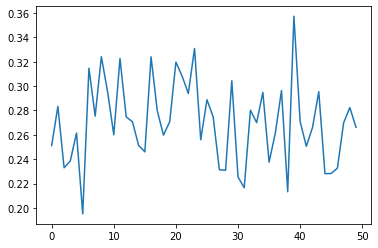

In [36]:
# graph the data
plt.plot(avgPVal)
plt.show()

In [ ]:
# ultimately I think this concludes that the mean alone has no bearing on the p-Val. I'd probably load these values into
# excel and run a spearman's correlation coefficient to double check, but they regression line looks flat to me

## Changing standard deviation while keeping the absolute standard deviation the same

In [56]:
# create the standard deviations (difference of .1)
stdevs1 = []
for x in range(50):
    add = x*.1 + 1 # increment by .1
    for y in range(30): # .1 
        stdevs1.append(add)

print(stdevs1)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6,

In [43]:
# the main problem in changing the standard deviation is that it changes the area sampled under
# under the curve as that is manually defined with rangeVal.
# We can determine the amount of the curve we sample by integrating the standard deviation curve
# and setting the limits to the rangeVal
# Using a mean of 0 and a standard deviation of 1 with rangeVal set to [-5, 5], the area of the
# normal curve being samples is .9999994266968562.
# link to calculator (https://www.integral-calculator.com/)

# This experiment is being run with the sig figs being run to 3 decimal places. This means that
# for the standard deviation of 1.9, the area sampled under the curve will be >= .999
# the same limits of integration will be applied to all other standard deviations with the 
# understanding that it only increases the accuracy of the simulation, but to a negligable amount

# the net difference in standard deviation between dist1 and dist2 is .1. This means the max
# standard deviation used will be 2 - this will be used to determine the limits of integration

# limits of integration: [-7,7]
# area yeilded: .9995347418...

In [57]:
p_val = []
for x in stdevs1:
    t, p = RandomTtest(x, 0, 10_000, [-7,7], 100, x+.1, 0, 10_000, [-7,7], 100)
    p_val.append(p)

print(p_val)

[0.7379788815206957, 0.7262753892683964, 0.6965570593433561, 0.5976499287407521, 0.6937924197540288, 0.9002661733192272, 0.398742868650784, 0.5646282149823223, 0.4678539342130861, 0.6414575096412894, 0.6815951281676651, 0.8431841733016843, 0.6257610662673967, 0.9487117284218605, 0.48198461417652194, 0.8967037473375157, 0.984312205426101, 0.9659061448485138, 0.37176871858927407, 0.32229840839961754, 0.9151954074938513, 0.5876179300086417, 0.8554836342145549, 0.9661579856529724, 0.8263496715237204, 0.8431014002130685, 0.8311130838382227, 0.9920303866669045, 0.8178260968327686, 0.9578934294841133, 0.9983651735524917, 0.6740326553177964, 0.9249377027113292, 0.8465321538188283, 0.6168319002253668, 0.7834215095427299, 0.9884782409591, 0.8389110068209529, 0.4262346664466593, 0.7927780805033187, 0.9577897768103951, 0.9282867925290186, 0.9703564763558776, 0.32943416437494955, 0.9912633351493857, 0.8114760037483588, 0.7758215161223078, 0.907173589323132, 0.7993277523961211, 0.7379367709718041, 0

In [58]:
# find average for each trial
avgPVal = []
for x in range(50): # number of values being tested
    temp = p_val[x*30:x*30+30] # number of sub-trials
    avg = statistics.mean(temp)
    avgPVal.append(avg)
print(avgPVal)

[0.7380065780099636, 0.7890338465821976, 0.7706473082746862, 0.7753644782049776, 0.8267390382259708, 0.7649529187768729, 0.8037150131019392, 0.7707262632447113, 0.7557690856922182, 0.7724301033002323, 0.8358341950355755, 0.791722973331548, 0.8314720050772796, 0.8551631356713336, 0.8206175326449286, 0.8567980268709394, 0.8400912083589286, 0.8265886435761329, 0.7547121140020916, 0.8464693192500325, 0.8556835038164762, 0.871901975651617, 0.8159105336887249, 0.809223558671094, 0.8115456354061924, 0.8534841467057275, 0.8029781141052028, 0.8278507959357386, 0.8610023101766042, 0.8167280433811489, 0.8429400421059344, 0.8629319936089692, 0.8368435049770288, 0.79658656813775, 0.8690785635852712, 0.8478035400650072, 0.8684406521168996, 0.8712964238507718, 0.8458387418374308, 0.8539354353348328, 0.8451223215048301, 0.8239019362641359, 0.8389935533902302, 0.8298815173241079, 0.82966463960911, 0.8495349677392101, 0.8584030979359704, 0.8774793964752186, 0.8519604276779557, 0.8583051650832427]


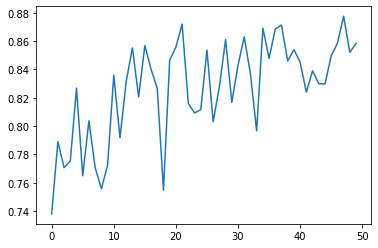

In [59]:
# graph the data
plt.plot(avgPVal)
plt.show()

In [55]:
# this one is definetly iffy
# I think larger and more intensive simulations need to be run (possibly on both), but this holds potential to be a
# major point of analysis as smaller expression values seemed to be preferred

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
